In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import matplotlib as mpl
from matplotlib.colors import LogNorm
from matplotlib.colors import Normalize
from scipy.interpolate import interp2d
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from labellines import labelLines
from labellines import labelLine
from PIL import Image

In [4]:
cities_populations = pd.DataFrame(columns=['city', 'population'])
for name in ['miami', 'ma', 'bogota']:
    pop = pd.read_csv(f'confinement/cities3/{name}/Poparea.txt', sep=' ', header=None)[1].sum()
    cities_populations = pd.concat([cities_populations, pd.DataFrame([[name, pop]], columns=['city', 'population'])])
cities_populations

,city,population
0,miami,5590269
0,ma,4146213
0,bogota,7129506


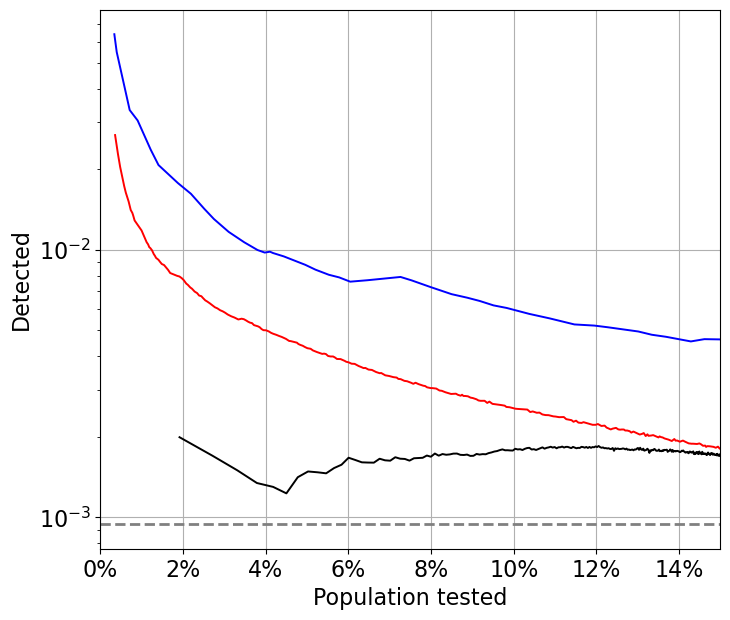

In [53]:
fig,ax = plt.subplots(figsize=(8,7))
label_size = 16
abc_size = 16*1.6

betastr = '4,0'
links = pd.read_csv('times/out/bogota_20k_30d_beta_' + betastr + '.txt', sep='\t')
transport = pd.read_csv('public_transport/times/out/bogota_transport_20k_beta_' + betastr + '.txt', sep='\t')
transport_population = pd.read_csv('public_transport/times/out/population/bogota_transport_20k_beta_' + betastr + '.txt', sep='\t')
lower = links['detected'].iloc[-1]

colormap = mpl.colormaps['viridis_r']

max_days,min_days = 17,9

total_tests = 20000 * 30

ax.plot(links['population'], links['detected']/total_tests, label='Links', c = 'blue', lw=1.4)
ax.plot(transport['population'], transport['detected']/total_tests, label='Transport', c = 'red', lw=1.4)
ax.plot(transport_population['population'], transport_population['detected']/total_tests, label='Population', c = 'black', lw=1.4)


total_pop = links['population'].max()

#Plot again the lines with alpha = 0 to set the legend
# ax.plot(links['population'], links['detected'], label='Links', alpha=0)
# ax.plot(transport['population'], transport['detected'], label='Transport', alpha=0)
ax.plot([0,7100000], [lower/total_tests, lower/total_tests], label='Random', c = 'grey', lw = 2, linestyle = 'dashed')

labelLine(ax.get_lines()[-4], zorder=2.5, x=0.1*total_pop, outline_width=5, align=False, yoffset=900, color=colormap(0.8))
labelLine(ax.get_lines()[-3], zorder=2.5, x=0.081*total_pop, outline_width=5, align=False, yoffset=900, color='red')
labelLine(ax.get_lines()[-2], zorder=2.5, x=0.04*total_pop, outline_width=5, align=False, yoffset=900, color='black')
labelLine(ax.get_lines()[-1], zorder=2.5, x=0.01*total_pop, outline_width=5, align=False, yoffset=800, color='grey')

# ax.legend(fontsize=label_size)


ax.set_xlabel('Population tested', size=label_size)
ax.set_ylabel('Detected', size=label_size)
ax.tick_params(labelsize=label_size)
ax.set_xlim(0, 0.15*total_pop)
# ax.set_ylim(0,)


ax.set_yscale('log')

# ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x, pos: '{:.0f}'.format(x/1000) + 'k'))

percentages = np.array([0,2,4,6,8,10,12,14]) * total_pop / 100
ax.xaxis.set_major_locator(mpl.ticker.FixedLocator(percentages))
ax.xaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x, pos: '{:.0f}'.format(x/total_pop*100) + '%'))

ax.grid('True')

# fig.savefig('figures/figs_dec23/Fig5a.svg', bbox_inches='tight', dpi=300)